In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import yatsm
from yatsm.io import read_pixel_timeseries
from yatsm.utils import csvfile_to_dataframe, get_image_IDs
from yatsm.config_parser import convert_config, parse_config_file
from yatsm.config_parser import convert_config, parse_config_file
import yatsm._cyprep as cyprep

Read in config file and dates:

In [78]:
def monthplot(dt_dates, Y):
    for date in dt_dates:
        if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
            plt.plot(date, Y[np.where(dt_dates==date)],'bo')
        elif date.month == 4 or date.month == 5:
            plt.plot(date, Y[np.where(dt_dates==date)],'co')
        elif date.month == 6 or date.month == 7 or date.month == 8:
            plt.plot(date, Y[np.where(dt_dates==date)],'go')
        else:
            plt.plot(date, Y[np.where(dt_dates==date)],'yo')

In [3]:
## SPECIFY CONFIG FILE
config_file = '/projectnb/landsat/projects/LCMS/1228/p012r028_config_pixel.yaml'

# Read in and parse config file
cfg = parse_config_file(config_file)

In [4]:
# Get files list
df = csvfile_to_dataframe(cfg['dataset']['input_file'], \
                          date_format=cfg['dataset']['date_format'])

In [5]:
xmin = datetime.datetime.strptime('1983 1', '%Y %j')
xmax = datetime.datetime.strptime('2013 365', '%Y %j')

Specify pixel to run:

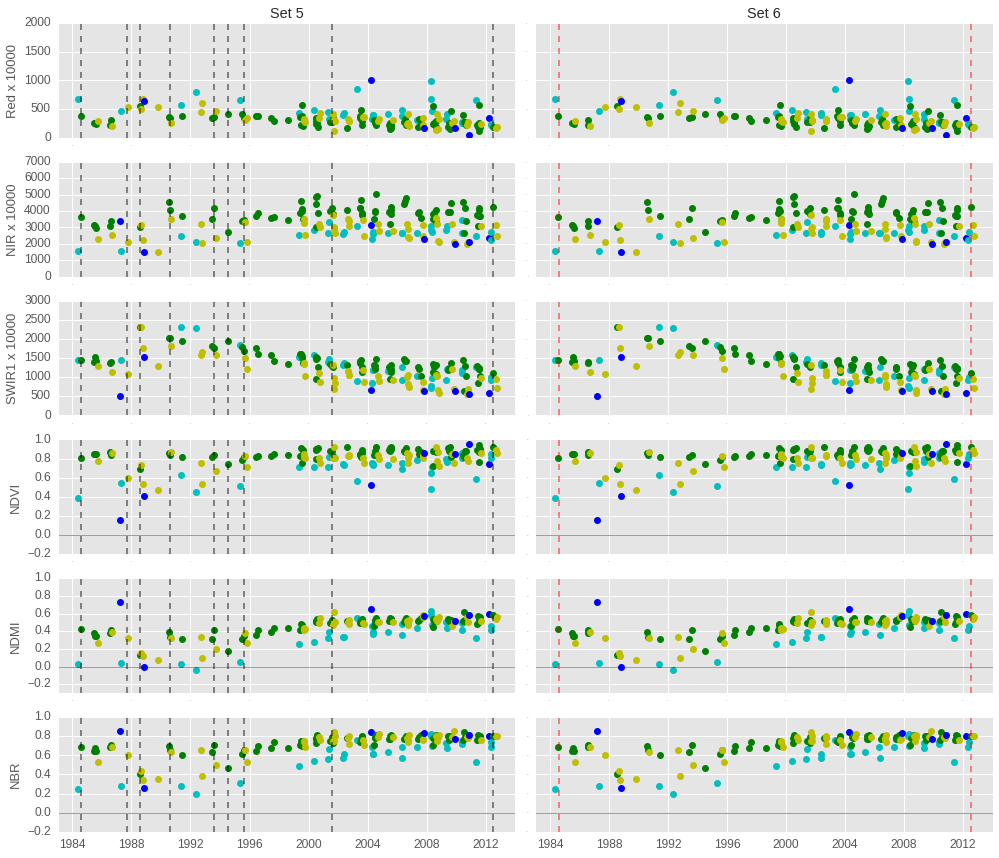

In [136]:
scene = 'p012r028'

# SPECIFY PIXEL TO RUN
py = 1598 # row
px = 5061 # column

plotid = 11


# Get dates
df['image_ID'] = get_image_IDs(df['filename']) 
df['x'] = df['date'] 
dates = df['date'].values

# Read in time series as numpy array
Y = read_pixel_timeseries(df['filename'], px, py)

# Mask based on physical constraints and Fmask 
valid = cyprep.get_valid_mask( \
            Y, \
            cfg['dataset']['min_values'], \
            cfg['dataset']['max_values']).astype(bool)

# Apply mask band
idx_mask = cfg['dataset']['mask_band'] - 1
valid *= np.in1d(Y.take(idx_mask, axis=0), \
                         cfg['dataset']['mask_values'], \
                         invert=True).astype(np.bool)

Y = np.delete(Y, idx_mask, axis=0)[:, valid]
#X = X[valid, :]
dates = dates[valid]

# convert time from ordinal to dates
dt_dates = np.array([dt.datetime.fromordinal(d) for d in dates])

# Calculate indices
NDVI = (Y[3] - Y[2]) / (Y[3] + Y[2]).astype(float)
NDMI = (Y[3] - Y[4]) / (Y[3] + Y[4]).astype(float)
NBR = (Y[3] - Y[5]) / (Y[3] + Y[5]).astype(float)

set1_1 = datetime.datetime.strptime('1984 203', '%Y %j')
set1_2 = datetime.datetime.strptime('1987 259', '%Y %j')
set1_3 = datetime.datetime.strptime('1988 214', '%Y %j')
set1_4 = datetime.datetime.strptime('1990 235', '%Y %j')
set1_5 = datetime.datetime.strptime('1993 227', '%Y %j')
set1_6 = datetime.datetime.strptime('1994 198', '%Y %j')
set1_7 = datetime.datetime.strptime('1995 233', '%Y %j')
set1_8 = datetime.datetime.strptime('2001 225', '%Y %j')
set1_9 = datetime.datetime.strptime('2012 192', '%Y %j')
set1 = [set1_1, set1_2, set1_3, set1_4, set1_5, set1_6, set1_7, set1_8, set1_9]

set2_1 = datetime.datetime.strptime('1984 221', '%Y %j')
set2_2 = datetime.datetime.strptime('2012 192', '%Y %j')
#set2_3 = datetime.datetime.strptime('1988 214', '%Y %j')
#set2_4 = datetime.datetime.strptime('1989 200', '%Y %j')
#set2_5 = datetime.datetime.strptime('1995 185', '%Y %j')
#set2_6 = datetime.datetime.strptime('2012 240', '%Y %j')
set2 = [set2_1, set2_2]#, set2_3, set2_4, set2_5, set2_6]

fig = plt.figure(figsize=(14,12),facecolor='w', edgecolor='k')
plt.style.use('ggplot') 
bands = (2, 3, 4)
i=1
for band in bands:
    ax = fig.add_subplot(6,2,i)
    for date in dt_dates:
        if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'bo')
        elif date.month == 4 or date.month == 5:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'co')
        elif date.month == 6 or date.month == 7 or date.month == 8:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'go')
        else:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'yo')
    plt.xlim((xmin, xmax))
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=12)
    plt.axhline(0.1, color='k', linestyle='-', alpha=0.75, lw=0.5)
    if band == 2:
        plt.ylim((0, 2000))
        plt.ylabel('Red x 10000', fontsize=13)
        plt.title('Set 5')
    elif band == 3:
        plt.ylim((0, 7000))
        plt.ylabel('NIR x 10000', fontsize=13)
    elif band == 4:
        plt.ylim((0, 3000))
        plt.ylabel('SWIR1 x 10000', fontsize=13)
    for ref in set1:
        plt.axvline(ref, color='k', linestyle='--', alpha=0.5)
    i=i+2
        
# Normalized Difference Vegetation Index
ax = fig.add_subplot(6,2,7)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'yo')  
plt.xlim((xmin, xmax))
plt.xticks(fontsize=0)
plt.ylim((-0.2, 1))
plt.yticks(fontsize=12)
plt.ylabel('NDVI', fontsize=13)
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)
for ref in set1:
    plt.axvline(ref, color='k', linestyle='--', alpha=0.5)

# Normalized Difference Moisture Index
ax = fig.add_subplot(6,2,9)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'yo')    
plt.xlim((xmin, xmax))
plt.xticks(fontsize=0)
plt.yticks(fontsize=12)
plt.ylim((-0.3, 1))
plt.ylabel('NDMI', fontsize=13)
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)
for ref in set1:
    plt.axvline(ref, color='k', linestyle='--', alpha=0.5) 
    
# Normalized Burn Ratio
ax = fig.add_subplot(6,2,11)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NBR[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NBR[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NBR[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NBR[np.where(dt_dates==date)],'yo')      
plt.xlim((xmin, xmax))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((-0.2, 1))
plt.ylabel('NBR', fontsize=13)
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)   
for ref in set1:
    plt.axvline(ref, color='k', linestyle='--', alpha=0.5)   


i=2
for band in bands:
    ax = fig.add_subplot(6,2,i)
    for date in dt_dates:
        if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'bo')
        elif date.month == 4 or date.month == 5:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'co')
        elif date.month == 6 or date.month == 7 or date.month == 8:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'go')
        else:
            plt.plot(date, Y[band, np.where(dt_dates==date)],'yo')
    plt.xlim((xmin, xmax))
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=0)
    plt.axhline(0.1, color='k', linestyle='-', alpha=0.75, lw=0.5)
    if band == 2:
        plt.ylim((0, 2000))
        plt.title('Set 6')
    elif band == 3:
        plt.ylim((0, 7000))
    elif band == 4:
        plt.ylim((0, 3000))
    for ref in set2:
        plt.axvline(ref, color='r', linestyle='--', alpha=0.5)
    i=i+2
        
# Normalized Difference Vegetation Index
ax = fig.add_subplot(6,2,8)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NDVI[np.where(dt_dates==date)],'yo')  
plt.xlim((xmin, xmax))
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.ylim((-0.2, 1))
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)
for ref in set2:
    plt.axvline(ref, color='r', linestyle='--', alpha=0.5)

# Normalized Difference Moisture Index
ax = fig.add_subplot(6,2,10)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NDMI[np.where(dt_dates==date)],'yo')    
plt.xlim((xmin, xmax))
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.ylim((-0.3, 1))
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)
for ref in set2:
    plt.axvline(ref, color='r', linestyle='--', alpha=0.5) 
    
# Normalized Burn Ratio
ax = fig.add_subplot(6,2,12)
for date in dt_dates:
    if date.month == 11 or date.month == 12 or date.month == 1 or date.month == 2 or date.month == 3:
        plt.plot(date, NBR[np.where(dt_dates==date)],'bo')
    elif date.month == 4 or date.month == 5:
        plt.plot(date, NBR[np.where(dt_dates==date)],'co')
    elif date.month == 6 or date.month == 7 or date.month == 8:
        plt.plot(date, NBR[np.where(dt_dates==date)],'go')
    else:
        plt.plot(date, NBR[np.where(dt_dates==date)],'yo')      
plt.xlim((xmin, xmax))
plt.xticks(fontsize=12)
plt.ylim((-0.2, 1))
plt.yticks(fontsize=0)
plt.axhline(0, color='k', linestyle='-', alpha=0.5, lw=0.75)   
for ref in set2:
    plt.axvline(ref, color='r', linestyle='--', alpha=0.5)  
fig.tight_layout()
plt.savefig('./{scene}_{plotid}_interpretations.png'.format(scene=scene, plotid=plotid))
plt.show()